In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import platform

In [64]:
import matplotlib.font_manager as fm  # 폰트 관리

!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정

In [65]:
# 데이터 호출
df = pd.read_json('https://gist.githubusercontent.com/soeun21216/eb79a06eb23e87890500829e7f1530b9/raw/7ba88b76a1623b3a05f1b6e97e3219e44cdfc775/gistfile1.txt')

# 시군구코드, 시도명 제거
df.drop(['CTGG_CD', 'CTPV_CD'], axis=1, inplace=True)

# 컬럼명을 알아보기 쉽게 변경
df.rename(columns={'INDTY_CGR_NM' : 'TYP_FOD', 'CTPV_NM': 'CITY_NM', 'CTGG_NM' : 'GU_NM', 'VST_RAT' : '방문비율'  }, inplace=True)

# 날씨를 코드에서 계절명으로 변경
df['SEASON_SP_CD'] = df['SEASON_SP_CD'].replace({1: '봄'})
df['SEASON_SP_CD'] = df['SEASON_SP_CD'].replace({2: '여름'})
df['SEASON_SP_CD'] = df['SEASON_SP_CD'].replace({3: '가을'})
df['SEASON_SP_CD'] = df['SEASON_SP_CD'].replace({4: '겨울'})

# 결측치가 있는 행 삭제
df.dropna(inplace=True)

df

,STD_YEAR,SEASON_SP_CD,TYP_FOD,CITY_NM,GU_NM,RANK,방문비율
0,2019,여름,동남아,서울특별시,구로구,5,3.11
1,2019,여름,동남아,부산광역시,중구,5,3.49
2,2019,여름,동남아,부산광역시,강서구,4,7.40
3,2019,여름,동남아,대전광역시,서구,1,100.00
4,2019,여름,분식,서울특별시,종로구,3,10.59
...,...,...,...,...,...,...,...
3793,2022,겨울,한식,경상남도,밀양시,1,100.00
3794,2022,겨울,한식,경상남도,양산시,1,100.00
3795,2022,겨울,한식,경상남도,고성군,1,100.00
3796,2022,겨울,한식,제주특별자치도,제주시,2,36.31


# 서울시 강남구 데이터 추출

In [66]:
# 서울시 강남구의 데이터만 추출
gangnam_data = df[(df['CITY_NM'] == '서울특별시') & (df['GU_NM'] == '강남구')]

# 연도, 업종별로 그룹화 후 순위의 평균 값 추출
df_gangnam_rank = gangnam_data.groupby(['STD_YEAR', 'TYP_FOD'])['RANK'].mean().round().astype(int)

gangnam_data

,STD_YEAR,SEASON_SP_CD,TYP_FOD,CITY_NM,GU_NM,RANK,방문비율
13,2019,여름,분식,서울특별시,강남구,5,6.44
61,2019,여름,중식,서울특별시,강남구,4,6.80
93,2019,여름,카페/패스트푸드,서울특별시,강남구,1,36.96
128,2019,여름,편의점,서울특별시,강남구,3,8.24
157,2019,여름,한식,서울특별시,강남구,2,34.25
...,...,...,...,...,...,...,...
3447,2022,겨울,분식,서울특별시,강남구,5,5.80
3536,2022,겨울,중식,서울특별시,강남구,4,10.96
3604,2022,겨울,카페/패스트푸드,서울특별시,강남구,1,32.85
3676,2022,겨울,편의점,서울특별시,강남구,3,13.50


# 2019년 여름 강남구의 여름 음식 인기 순위

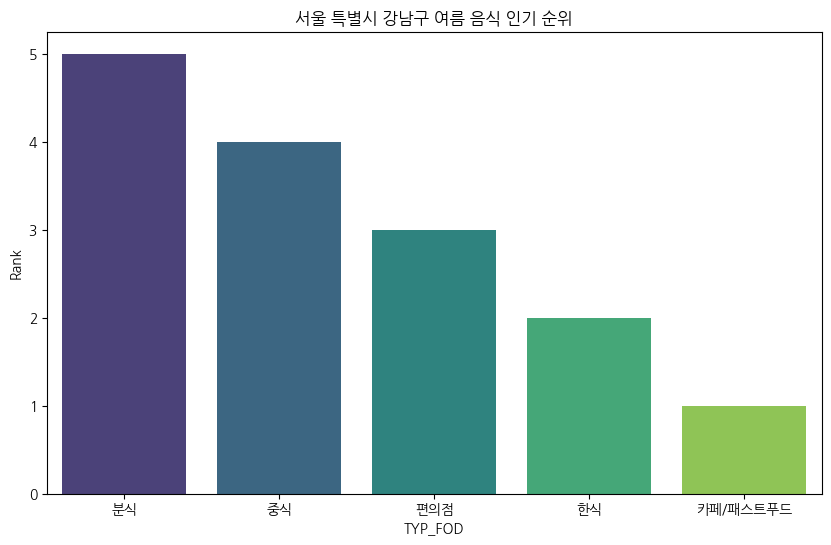

In [67]:
gangnam_2019s_df = gangnam_data[(gangnam_data['STD_YEAR'] == 2019) & (gangnam_data['SEASON_SP_CD'] == '여름')]

# 데이터 정렬
gangnam_2019s_df = gangnam_2019s_df.sort_values(by='RANK', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='TYP_FOD', y='RANK', data=gangnam_2019s_df, palette='viridis')
plt.title('서울 특별시 강남구 여름 음식 인기 순위')
plt.xlabel('TYP_FOD')
plt.ylabel('Rank')
plt.show()

# 2022 서울시 강남 음식점 레이더 차트

In [68]:
# 2022년 강남구 겨울 데이터 추출
gangnam_2022w_df = gangnam_data[(gangnam_data['STD_YEAR'] == 2022) & (gangnam_data['SEASON_SP_CD'] == '겨울')]

# 방문 비율이 가장 높은 값
max_point = gangnam_2022w_df[gangnam_2022w_df['방문비율'] == gangnam_2022w_df['방문비율'].max()]
# 방문 비율이 가장 낮은 값
min_point = gangnam_2022w_df[gangnam_2022w_df['방문비율'] == gangnam_2022w_df['방문비율'].min()]

fig = px.line_polar(gangnam_2022w_df, r='방문비율', theta='TYP_FOD', line_close=True,
                    title=' 2022 서울시 강남 음식점 방문 비율 레이더 차트  ',
                    labels={'방문비율': '방문비율', 'TYP_FOD': 'TYP_FOD'},
                    template='plotly')

# scatter로 가장 방문 비율이 가장 높은 곳과 낮은 곳을 표시
fig.add_trace(px.scatter_polar(max_point, r='방문비율', theta='TYP_FOD').data[0])
fig.add_trace(px.scatter_polar(min_point, r='방문비율', theta='TYP_FOD').data[0])

# 제목을 가운데로 이동
fig.update_layout(title_x=0.5)
fig.show()


# 2022년 구로구의 겨울 음식점 방문률

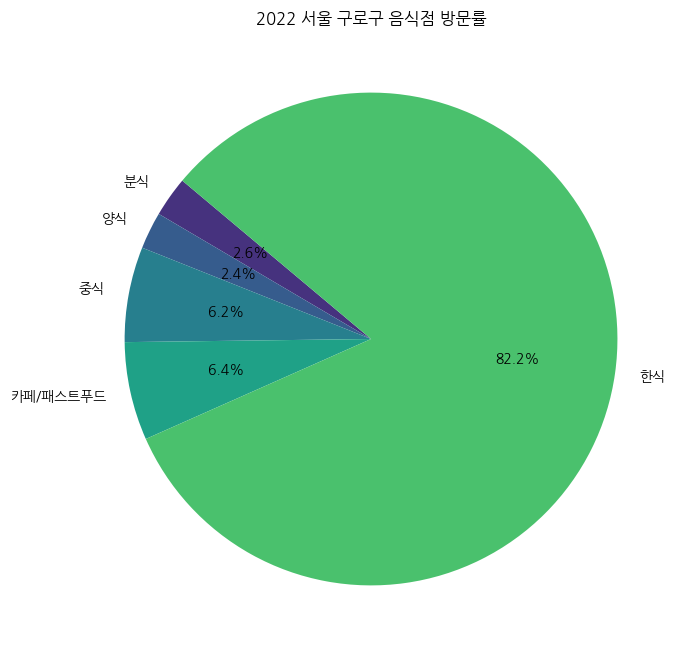

In [69]:
# 구로구 데이터만 추출
guro_2022_winter_df = df[(df['STD_YEAR'] == 2022) & (df['SEASON_SP_CD'] == '겨울') & (df['GU_NM'] == '구로구')]
plt.figure(figsize=(8, 8))
plt.pie(guro_2022_winter_df['방문비율'], labels=guro_2022_winter_df['TYP_FOD'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('2022 서울 구로구 음식점 방문률')
plt.show()

# 서울시 전체 음식점 종류별 빈도

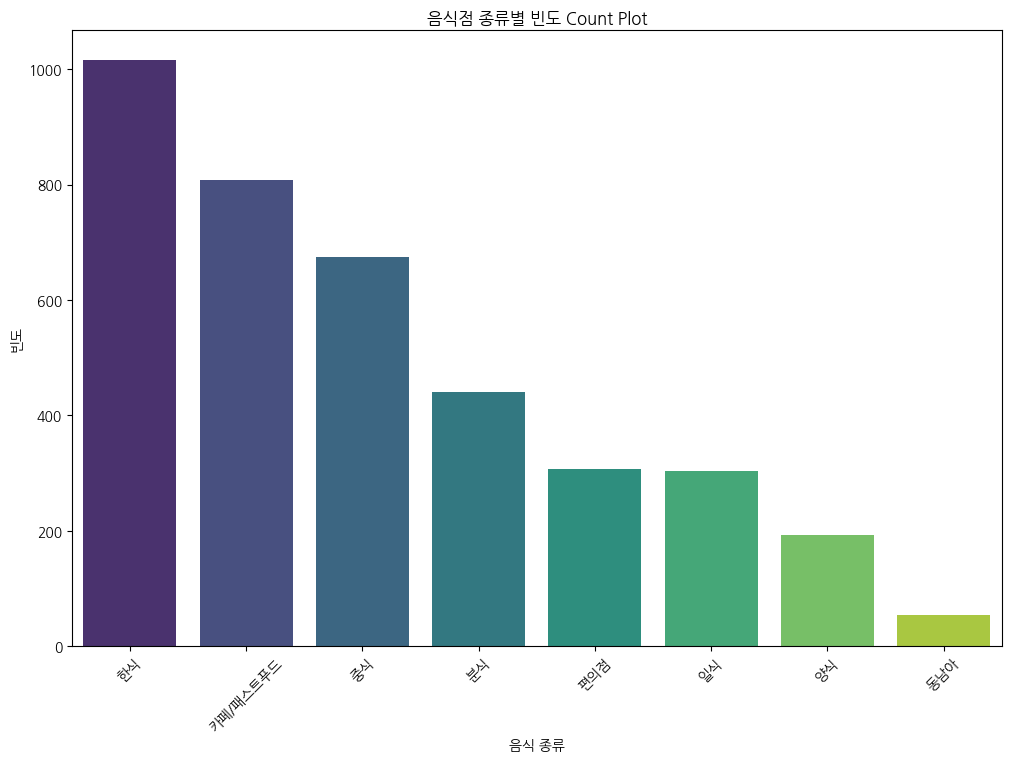

In [70]:
# Count Plot 생성
plt.figure(figsize=(12, 8))

# 빈도순으로 정렬한 DataFrame 생성
sorted_df = df['TYP_FOD'].value_counts().reset_index()
sorted_df.columns = ['TYP_FOD', '빈도']

# Countplot 그리기
sns.barplot(x='TYP_FOD', y='빈도', data=sorted_df, palette='viridis')
plt.title('음식점 종류별 빈도 Count Plot')
plt.xlabel('음식 종류')
plt.ylabel('빈도')
plt.xticks(rotation=45)  # X축 눈금 레이블 회전
plt.show()

# 계절별 음식 업종 방문 비율 히트맵

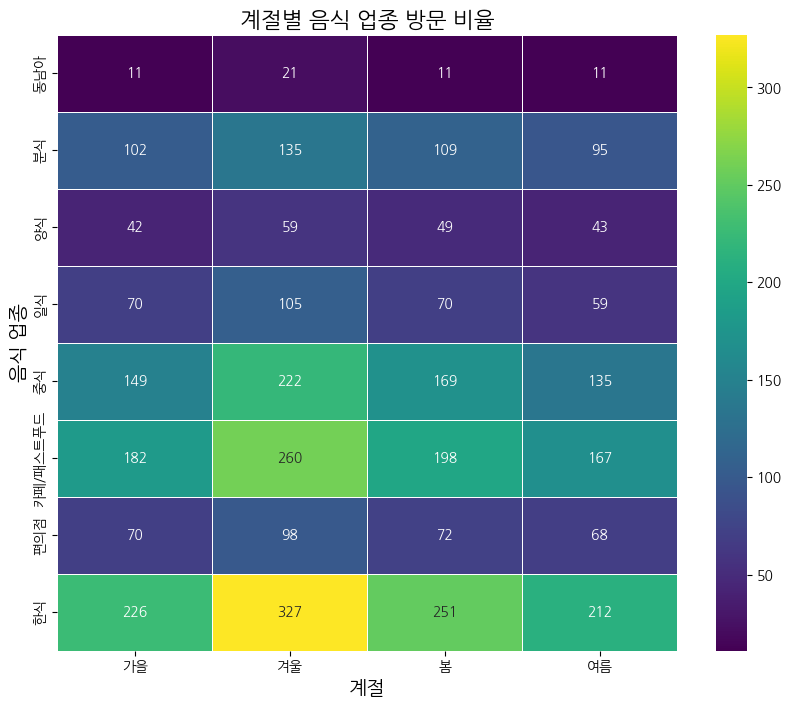

In [72]:
# 계절별로 그룹화,
season_df = pd.DataFrame({
    x_label: group['TYP_FOD'].value_counts()
    for x_label, group in df.groupby('SEASON_SP_CD')
})

# 시각화를 위한 figure와 axes 설정
fig, ax = plt.subplots(figsize=(10, 8))

# 히트맵 생성(annot=True: 비율을 텍스트로 생성)
sns.heatmap(season_df, cmap='viridis', annot=True, fmt='d', linewidths=.5, ax=ax)

# X축 제목
plt.xlabel('계절', fontsize=14)
# Y축 제목
plt.ylabel('음식 업종', fontsize=14)
# 타이틀
plt.title('계절별 음식 업종 방문 비율', fontsize=16)


plt.show()
